In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from kelp3d_definitions import *
import scipy.io

# Widgets

In [2]:
gw

A Jupyter Widget

In [3]:
rope.water_speeds = 0*rope.water_speeds + .5

In [4]:
rw

A Jupyter Widget

In [5]:
fw

A Jupyter Widget

In [6]:
iw

A Jupyter Widget

In [7]:
bcw

A Jupyter Widget

In [8]:
pw

A Jupyter Widget

In [9]:
vpw = VolumePlotWidget(kelp, light)
vpw

A Jupyter Widget

In [10]:
vpw.log_area

A Jupyter Widget

In [11]:
vpw.load_irradiance()

In [12]:
vpw.control_panel

A Jupyter Widget

In [13]:
radw

A Jupyter Widget

In [14]:
radw.log_widget

A Jupyter Widget

# Other Plots/Stats

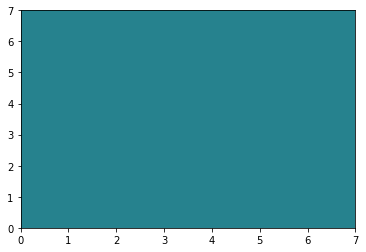

In [15]:
plt.contourf(kelp.p_kelp[:,4,:].T)

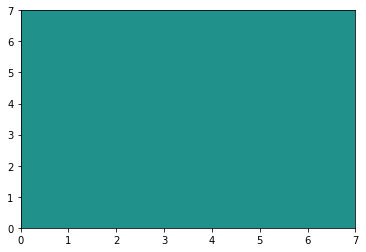

In [16]:
plt.contourf(light.irradiance[:,2,:].T)

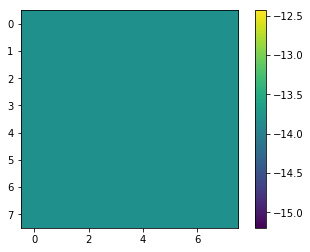

In [17]:
plt.imshow(np.log(light.irradiance[:,2,:].T))
plt.colorbar()

In [18]:
x = np.arange(grid.x.num)
y = np.arange(grid.y.num)
z = np.arange(grid.z.num)
theta = np.arange(grid.theta.num)
phi = np.arange(grid.phi.num)

X, Y, Z, T, P = np.meshgrid(x,y,z,theta,phi, indexing='ij')

In [19]:
stats(light.radiance)

min: 1e-06
max: 1e-06
mean: 1.0000000000000002e-06
std: 2.117582368135751e-22


In [20]:
stats(light.irradiance)

min: 1e-06
max: 1e-06
mean: 1.0000000000000002e-06
std: 2.117582368135751e-22


In [21]:
stats(light.radiance[:,:,:,:,3])

min: 1e-06
max: 1e-06
mean: 1.0000000000000002e-06
std: 2.117582368135751e-22


# Load/render RTE Matrix

In [22]:
row = np.loadtxt('row.txt', dtype=int)-1
col = np.loadtxt('col.txt', dtype=int)-1
data = np.loadtxt('data.txt')
rhs = np.loadtxt('rhs.txt')

In [ ]:
mat = scipy.sparse.coo_matrix((data, (row, col)))

In [ ]:
#mat_bool = scipy.sparse.coo_matrix(
#    np.ones(len(mat.nonzero()[0])), 
#    mat.nonzero(), 
#    dtype=bool
#).toarray()
mat_bool = mat.astype(bool).toarray()
mat_int = 255 * (1 - mat_bool.astype(int))
scipy.misc.imsave('mat.png',mat_int)

In [ ]:
d = mat.diagonal()

In [ ]:
nx = grid.x.num
ny = grid.y.num
nz = grid.z.num
ntheta = grid.theta.num
nphi = grid.phi.num

# order: z,y, x, phi, theta

# Verify MGMRES

In [ ]:
x = scipy.sparse.linalg.spsolve(mat, rhs)

In [ ]:
stats(x)

# Misc. diagnostics

In [ ]:
dx = grid.x.spacing
dz = grid.z.spacing
phi = grid.phi.vals
theta = grid.theta.vals
3*np.cos(phi)/(2*dz)

In [ ]:
ent = 0
for k in range(nx):
    for j in range(ny):
        for i in range(nx):
            for m in range(nphi):
                for l in range(ntheta):
                    print(i,j,k,l,m,':',d[ent], rhs[ent])
                    ent += 1